# Notes
* Something is amiss with the LASSO regression, which could mean the processing is messed up as well. 

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras
from keras import models, layers
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, median_absolute_error
from scipy.stats import linregress
from google.colab import files
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

np.set_printoptions(suppress=True)
plt.rcParams['font.family']='serif'

In [39]:
combined_df = pd.read_csv('https://raw.githubusercontent.com/thissop/MAXI-J1535/main/data/processed/fixed_merged.csv')

combined_df = combined_df.sample(frac=1) # shuffle the dataframe

freqs_1, freqs_2, freqs_3 = (np.array(combined_df[arr_name]) for arr_name in ['first_par1s', 'second_par1s', 'third_par1s'])

def normalize(x):
    x = (x-min(x))/(max(x)-min(x))
    return x

shared_columns = ['hardness', 'num_qpos', 'tins', 'disk_norm',
                  'gammas','count_rates'] # add num qpos later 

df_1 = combined_df[['first_par1s', 'first_par2s']+shared_columns]

df_2 = combined_df[['second_par1s', 'second_par2s']+shared_columns]

df_3 = combined_df[['third_par1s', 'third_par2s']+shared_columns]

dfs = [df_1, df_2, df_3]

good_indices = np.array([np.where(arr!=0)[0] for arr in [freqs_1, freqs_2, freqs_3]])

df_1, df_2, df_3 = (dfs[i].iloc[good_indices[i]] for i in range(3))

for df in [df_1, df_2, df_3]:
    df.keys().values[[0, 1]] = ['freq', 'fwhm']

combined_df = pd.concat([df_1, df_2, df_3]) 

combined_df = combined_df.sort_values('gammas')

combined_df = combined_df.drop('tins', axis=1)

y = np.array(combined_df['fwhm'])
x_df = combined_df.drop('fwhm', axis=1)

X_train, X_test, y_train, y_test = train_test_split(x_df,y,test_size=0.05)
print(x_df.to_string())

        freq  hardness  num_qpos   disk_norm   gammas   count_rates
23   3.52992  0.390972       2.0  18813800.0  2.15973   6966.860077
23   1.79927  0.390972       2.0  18813800.0  2.15973   6966.860077
22   3.60878  0.389199       3.0  18851700.0  2.16549   6955.408606
22   1.81925  0.389199       3.0  18851700.0  2.16549   6955.408606
22   5.55236  0.389199       3.0  18851700.0  2.16549   6955.408606
20   1.79927  0.389608       2.0  18653400.0  2.16756   6860.966181
20   3.56914  0.389608       2.0  18653400.0  2.16756   6860.966181
21   3.64887  0.388604       3.0  18552600.0  2.17059   6893.771748
21   1.81925  0.388604       3.0  18552600.0  2.17059   6893.771748
21   5.55236  0.388604       3.0  18552600.0  2.17059   6893.771748
17   3.60878  0.387888       2.0  18528500.0  2.17196   6874.431008
17   1.79927  0.387888       2.0  18528500.0  2.17196   6874.431008
24   5.37136  0.386902       3.0  18718000.0  2.17970   6992.776788
24   3.73039  0.386902       3.0  18718000.0  2.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


## LASSO

In [58]:
def lasso(X_train, y_train, X_test): 
    regressor = Lasso(alpha=0.5, fit_intercept=True, max_iter=5000)
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)
    return predictions

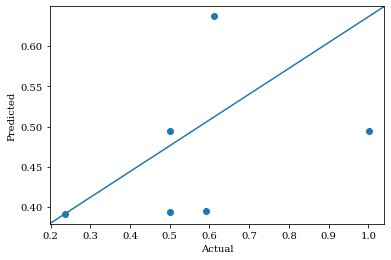

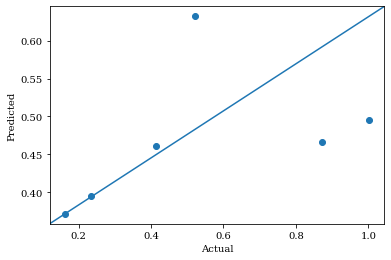

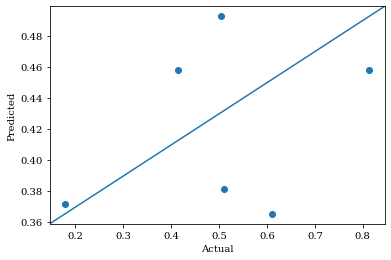

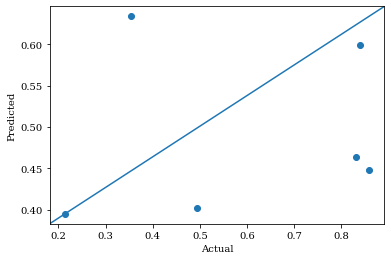

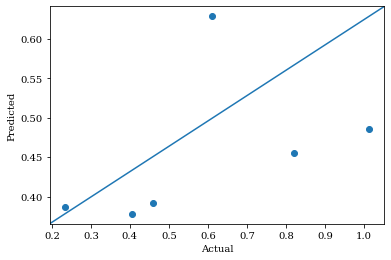

In [59]:
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(x_df,y,test_size=0.05)
    predictions = lasso(X_train, y_train, X_test)

    fig, ax = plt.subplots(1)
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, label='1:1')
    ax.scatter(y_test, predictions)
    ax.set(xlabel='Actual', ylabel='Predicted')
    plt.show()

## OLS

In [64]:
def ols(X_train, y_train, X_test):
    regressor = LinearRegression(fit_intercept=True)
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)
    return predictions

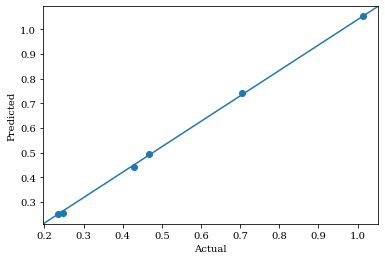

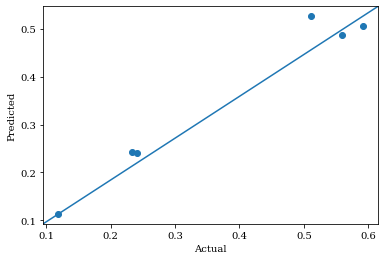

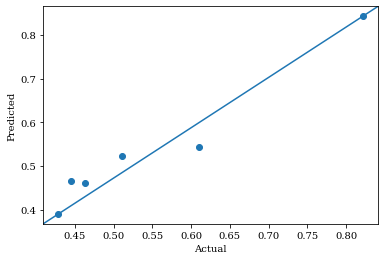

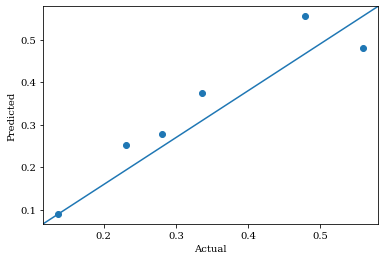

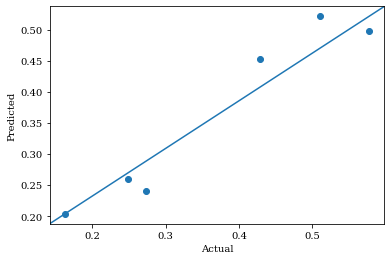

In [65]:
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(x_df,y,test_size=0.05)
    predictions = ols(X_train, y_train, X_test)

    fig, ax = plt.subplots(1)
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, label='1:1')
    ax.scatter(y_test, predictions)
    ax.set(xlabel='Actual', ylabel='Predicted')
    plt.show()